# Investment Analysis Assignment

Assignment Brief:<br>
You work for Spark Funds, an asset management company. Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

constraints:
1. It wants to invest between 5 to 15 million USD per round of investment

2. It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in

Compony Investment Stratergy:<br>

Spark Funds wants to invest where most other investors are investing. This pattern is often observed among early stage startup investors.

Goal of the Data Analysis:<br>
1. Funding type analysis
2. Country analysis
3. Sector analysis

In [1]:
# Import the required packages for the analysis
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the datasets
companies = pd.read_csv("companies.csv", encoding="ISO-8859-1")
round2 = pd.read_csv("rounds2.csv", encoding="ISO-8859-1")

In [3]:
# Exploring round2 dataframe
round2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [4]:
round2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [5]:
round2.describe(include="all")

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
count,114949,114949,114949,31140,114949,9.495900e+04
unique,90247,114949,14,8,5033,NaN
top,/ORGANIZATION/SOLARFLARE,/funding-round/b62e2d36cb07afdc3c2e7b980828b340,venture,A,01-01-2014,NaN
freq,10,1,55494,14747,779,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.042687e+07
std,NaN,NaN,NaN,NaN,NaN,1.148212e+08
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,3.225000e+05
50%,NaN,NaN,NaN,NaN,NaN,1.680511e+06
75%,NaN,NaN,NaN,NaN,NaN,7.000000e+06


In [6]:
# 1.1 Number of unique companies present in round2 dataframe

round2['company_permalink']= round2['company_permalink'].str.lower()
print(len(round2['company_permalink'].unique()))

66370


In [7]:
# Exploring companies dataframe
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [8]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [9]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Carolus-Therapeutics,Blink,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [10]:
# 1.2 Number of unique companies present in companies dataframe
companies['permalink'] = companies['permalink'].str.lower()
print(len(companies['permalink'].unique()))

66368


1.4 We have already calculated the number of unique companies in both files i.e. round2 and companies and there are
two extra companies present in round2 dataset which was calculated by taking the difference between the unique number of companies in both file(66370-66368) = 2

In [12]:
# 1.5 Creating master dataframe by merging round2 and companies data frame

master_frame= pd.merge(round2, companies, how="inner", left_on = "company_permalink", right_on = "permalink")
print(len(master_frame.index))

114942


In [13]:
# Exploring master_frame 
master_frame.head(10)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011


In [14]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114942 non-null  object 
 1   funding_round_permalink  114942 non-null  object 
 2   funding_round_type       114942 non-null  object 
 3   funding_round_code       31139 non-null   object 
 4   funded_at                114942 non-null  object 
 5   raised_amount_usd        94958 non-null   float64
 6   permalink                114942 non-null  object 
 7   name                     114941 non-null  object 
 8   homepage_url             108810 non-null  object 
 9   category_list            111535 non-null  object 
 10  status                   114942 non-null  object 
 11  country_code             106271 non-null  object 
 12  state_code               104003 non-null  object 
 13  region                   104782 non-null  object 
 14  city

In [15]:
master_frame.describe(include="all")

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,114942,114942,114942,31139,114942,9.495800e+04,114942,114941,108810,111535,114942,106271,104003,104782,104785,94422
unique,66363,114942,14,8,5033,NaN,66363,66094,61188,27295,4,137,311,1092,5111,3977
top,/organization/solarflare,/funding-round/b62e2d36cb07afdc3c2e7b980828b340,venture,A,01-01-2014,NaN,/organization/solarflare,Solarflare Communications,http://www.solarflare.com,Biotechnology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,19,1,55493,14746,779,NaN,19,19,19,8165,90151,72308,26664,19078,7422,4642
mean,NaN,NaN,NaN,NaN,NaN,1.042696e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,1.148218e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,3.225000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,1.680521e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,7.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Cleaning of master dataframe

# Inspecting null values
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd          19984
permalink                      0
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
dtype: int64

In [17]:
# Finding the percentage of null values in master data frame
print(round((master_frame.isnull().sum()/len(master_frame.index))*100, 2))

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.54
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64


In [18]:
# Dropping columns which are not required to perform analysis

master_frame = master_frame.drop(['funding_round_code','permalink', 'homepage_url',
                                  'state_code', 'region', 'city', 'founded_at'], axis=1)

In [19]:
# We need to remove the rows with NaN values from raised_amount_usd to provide relevant results during analysis
master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]

In [20]:
#Re-checking the null value percentage post deletion of rows
print(round((master_frame.isnull().sum()/len(master_frame.index))*100, 2))

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
name                       0.00
category_list              1.10
status                     0.00
country_code               6.16
dtype: float64


In [21]:
# Imputing NaNs in country_code and category_list with Unspecified (UNS)
master_frame['country_code'] = master_frame['country_code'].fillna('UNS')
master_frame['category_list'] = master_frame['category_list'].fillna('Unspecified')
print(round((master_frame.isnull().sum()/len(master_frame.index))*100, 2))

company_permalink          0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
dtype: float64


In [22]:
# Percentage of retained rows
print(100*(len(master_frame.index)/114949))

82.60880912404632


In [23]:
master_frame.shape

(94958, 9)

# Funding Type Analysis

In [25]:
# Taking venture, angel, seed and private equity from funding_round_type column
master_frame=master_frame[master_frame['funding_round_type'].isin(['venture','angel','seed','private_equity'])]

In [26]:
# Finding the averages of raised amount by each funding type
round(master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False),2)

funding_round_type
private_equity    73308593.03
venture           11748949.13
angel               958694.47
seed                719779.62
Name: raised_amount_usd, dtype: float64

Sparks Fund wants to invest between 5 to 15 million USD and clearly 'Venture' funding type satisfy this constraint.

In [154]:
# From now on we are considering funding type as 'venture'
master_frame_vf = master_frame[master_frame["funding_round_type"]=="venture"]
master_frame_vf['funding_round_type'].describe()

count       50228
unique          1
top       venture
freq        50228
Name: funding_round_type, dtype: object

In [155]:
master_frame_vf.shape

(50228, 9)

# Country Type Analysis

In [156]:
# Top 15 countries with highest funding
master_frame_vf.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(15)

country_code
USA    4.225108e+11
CHN    3.983542e+10
UNS    2.550611e+10
GBR    2.024563e+10
IND    1.439186e+10
CAN    9.583332e+09
FRA    7.259537e+09
ISR    6.907515e+09
DEU    6.346960e+09
JPN    3.363677e+09
SWE    3.254953e+09
NLD    2.939404e+09
CHE    2.827560e+09
SGP    2.793918e+09
ESP    1.835831e+09
Name: raised_amount_usd, dtype: float64

In [157]:
# Selecting top 9 countries with highest funding excluding UNS(Unspecified)
top9 = master_frame_vf[master_frame_vf['country_code'].isin(['USA', 'CHN','GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN' ])]
top9.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA    4.225108e+11
CHN    3.983542e+10
GBR    2.024563e+10
IND    1.439186e+10
CAN    9.583332e+09
FRA    7.259537e+09
ISR    6.907515e+09
DEU    6.346960e+09
JPN    3.363677e+09
Name: raised_amount_usd, dtype: float64

In [32]:
# As per the document provided, the top three english speaking countries as per the amount raised are USA, GBR and IND

In [33]:
top9.shape

(44383, 9)

In [35]:
# Spliting data with | in category_list and storing it to primary_sector
top9['primary_sector'] =top9['category_list'].astype(str).apply(lambda x: x.split('|')[0])

In [36]:
top9.shape

(44383, 10)

In [37]:
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,Media,operating,IND,Media
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,0-6.com,Curated Web,operating,CHN,Curated Web
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,Ondine Biomedical Inc.,Biotechnology,operating,CAN,Biotechnology
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,H2O.ai,Analytics,operating,USA,Analytics
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,H2O.ai,Analytics,operating,USA,Analytics


In [38]:
# Dropping category_list
top9 = top9.drop('category_list', axis= 1)
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,status,country_code,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,operating,IND,Media
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,0-6.com,operating,CHN,Curated Web
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,Ondine Biomedical Inc.,operating,CAN,Biotechnology
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,H2O.ai,operating,USA,Analytics
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,H2O.ai,operating,USA,Analytics


# Sector Analysis-1

In [70]:
#Importing mapping dataset
mapping = pd.read_csv("mapping.csv", encoding = "ISO-8859-1")
mapping.head(10)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1


In [71]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [72]:
mapping= pd.melt(mapping, id_vars=['category_list'], var_name=['main_sector'])
mapping=mapping[mapping.value==1]
mapping=mapping.drop('value',axis=1)
mapping.shape

(688, 2)

In [73]:
# function to replace 0 with na
import re
mapping['category_list'] = mapping.category_list.apply(lambda x: re.sub('[0]', 'na', str(x)))

In [75]:
mapping.head()

,category_list,main_sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports


In [76]:
top9=pd.merge(top9,mapping,how="left",left_on="primary_sector",right_on="category_list")

In [77]:
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,status,country_code,primary_sector,category_list,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,operating,IND,Media,Media,Entertainment
1,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,0-6.com,operating,CHN,Curated Web,Curated Web,"News, Search and Messaging"
2,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,Ondine Biomedical Inc.,operating,CAN,Biotechnology,Biotechnology,Cleantech / Semiconductors
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,H2O.ai,operating,USA,Analytics,Analytics,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,H2O.ai,operating,USA,Analytics,Analytics,"Social, Finance, Analytics, Advertising"


In [78]:
top9=top9.drop('category_list',axis=1)
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,status,country_code,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,operating,IND,Media,Entertainment
1,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,0-6.com,operating,CHN,Curated Web,"News, Search and Messaging"
2,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,Ondine Biomedical Inc.,operating,CAN,Biotechnology,Cleantech / Semiconductors
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,H2O.ai,operating,USA,Analytics,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,H2O.ai,operating,USA,Analytics,"Social, Finance, Analytics, Advertising"


In [79]:
top9['main_sector'].head()

0                              Entertainment
1                 News, Search and Messaging
2                 Cleantech / Semiconductors
3    Social, Finance, Analytics, Advertising
4    Social, Finance, Analytics, Advertising
Name: main_sector, dtype: object

In [80]:
len(top9[top9['main_sector'].isnull()])

440

In [81]:
top9=top9[~(top9['main_sector'].isnull())]

In [82]:
len(top9[top9['main_sector'].isnull()])

0

In [84]:
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,status,country_code,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,operating,IND,Media,Entertainment
1,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,0-6.com,operating,CHN,Curated Web,"News, Search and Messaging"
2,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,Ondine Biomedical Inc.,operating,CAN,Biotechnology,Cleantech / Semiconductors
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,H2O.ai,operating,USA,Analytics,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,H2O.ai,operating,USA,Analytics,"Social, Finance, Analytics, Advertising"


# Sector Analysis-2

Sector Analysis- USA

In [98]:
D1=top9[top9['country_code']=='USA']
D1 = D1[(D1['raised_amount_usd'] >= 5000000) & (D1['raised_amount_usd'] <= 15000000)]

In [138]:
D1.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,status,country_code,primary_sector,main_sector
5,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,H2O.ai,operating,USA,Analytics,"Social, Finance, Analytics, Advertising"
6,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,1 Mainstream,acquired,USA,Apps,"News, Search and Messaging"
29,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,16-12-2014,11999347.0,128 Technology,operating,USA,Service Providers,Others
32,/organization/1366-technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,15-10-2013,15000000.0,1366 Technologies,operating,USA,Manufacturing,Manufacturing
33,/organization/1366-technologies,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,09-04-2015,5000000.0,1366 Technologies,operating,USA,Manufacturing,Manufacturing


In [99]:
D1.raised_amount_usd.sum()

107318294664.0

In [100]:
D1.raised_amount_usd.count()

12012

In [101]:
D1.shape

(12012, 10)

In [104]:
#Finding the top sectors with the highest number of investments in USA.
D1.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending = False).head()

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2300
News, Search and Messaging                 1582
Health                                      909
Name: raised_amount_usd, dtype: int64

In [105]:
D1.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending = False).head()

main_sector
Others                                     2.632101e+10
Social, Finance, Analytics, Advertising    2.380738e+10
Cleantech / Semiconductors                 2.120663e+10
News, Search and Messaging                 1.395957e+10
Health                                     8.211859e+09
Name: raised_amount_usd, dtype: float64

In [107]:
#Finding the highest invested company among the 1st Top sectors of the country.
D1[D1['main_sector']=='Others'].groupby(['main_sector','company_permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector  company_permalink                
Others       /organization/virtustream            64300000.0
             /organization/capella                54968051.0
             /organization/airtight-networks      54201907.0
             /organization/decarta                52100000.0
             /organization/black-duck-software    51000000.0
Name: raised_amount_usd, dtype: float64

In [109]:
#Finding the highest invested company among the 2nd Top sectors of the country.
D1[D1['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','company_permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                              company_permalink        
Social, Finance, Analytics, Advertising  /organization/shotspotter    67933006.0
                                         /organization/demandbase     63000000.0
                                         /organization/intacct        61800000.0
                                         /organization/netbase        60600000.0
                                         /organization/lotame         59700000.0
Name: raised_amount_usd, dtype: float64

Sector Analysis- GBR

In [114]:
D2=top9[top9['country_code']=='GBR']
D2 = D2[(D2['raised_amount_usd'] >= 5000000) & (D2['raised_amount_usd'] <= 15000000)]

In [116]:
D2.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,status,country_code,primary_sector,main_sector
137,/organization/365scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,29-09-2014,5500000.0,365Scores,operating,GBR,Android,"Social, Finance, Analytics, Advertising"
315,/organization/7digital,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,01-01-2008,8468328.0,7digital,acquired,GBR,Content Creators,Entertainment
316,/organization/7digital,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,19-10-2012,10000000.0,7digital,acquired,GBR,Content Creators,Entertainment
341,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,90min,operating,GBR,Media,Entertainment
342,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,90min,operating,GBR,Media,Entertainment


In [117]:
D2.raised_amount_usd.sum()

5365228300.0

In [118]:
D2.shape

(619, 10)

In [121]:
#Finding the top sectors with the highest number of investments in GBR.
D2.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending = False).head()

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 128
News, Search and Messaging                  73
Entertainment                               56
Name: raised_amount_usd, dtype: int64

In [122]:
D2.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending = False)

main_sector
Others                                     1.283624e+09
Cleantech / Semiconductors                 1.150140e+09
Social, Finance, Analytics, Advertising    1.089404e+09
News, Search and Messaging                 6.157462e+08
Entertainment                              4.827847e+08
Manufacturing                              3.619403e+08
Health                                     2.145375e+08
Automotive & Sports                        1.670516e+08
Name: raised_amount_usd, dtype: float64

In [123]:
#Finding the highest invested company among the 1st Top sectors of the country.
D2[D2['main_sector']=='Others'].groupby(['main_sector','company_permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector  company_permalink                    
Others       /organization/electric-cloud             37000000.0
             /organization/sensage                    36250000.0
             /organization/enigmatic                  32500000.0
             /organization/silverrail-technologies    29000000.0
             /organization/opencloud                  27972766.0
Name: raised_amount_usd, dtype: float64

In [140]:
#Finding the highest invested company among the 2nd Top sectors of the country.
D2[D2['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','company_permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                              company_permalink                  
Social, Finance, Analytics, Advertising  /organization/celltick-technologies    37500000.0
                                         /organization/mythings                 34000000.0
                                         /organization/zopa                     32900000.0
                                         /organization/imagini                  28550000.0
                                         /organization/marketinvoice            25553007.0
Name: raised_amount_usd, dtype: float64

Sector Analysis- IND

In [129]:
D3=top9[top9['country_code']=='IND']
D3 = D3[(D3['raised_amount_usd'] >= 5000000) & (D3['raised_amount_usd'] <= 15000000)]

In [130]:
D3.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,status,country_code,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,operating,IND,Media,Entertainment
76,/organization/21diamonds-india,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,6369507.0,21Diamonds,operating,IND,E-Commerce,Others
372,/organization/a-little-world,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,09-09-2008,6410000.0,A LITTLE WORLD,operating,IND,Finance,"Social, Finance, Analytics, Advertising"
1076,/organization/adlabs-imagica,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,28-10-2014,8180000.0,Adlabs Imagica,operating,IND,Entertainment,Entertainment
1458,/organization/agile,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,01-05-2011,5740000.0,Agile,operating,IND,Finance,"Social, Finance, Analytics, Advertising"


In [131]:
D3.raised_amount_usd.sum()

2949543602.0

In [132]:
D3.shape

(328, 10)

In [133]:
#Finding the top sectors with the highest number of investments in IND.
D3.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending = False).head()

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Name: raised_amount_usd, dtype: int64

In [134]:
D3.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending = False)

main_sector
Others                                     1.013410e+09
Social, Finance, Analytics, Advertising    5.505496e+08
News, Search and Messaging                 4.338345e+08
Entertainment                              2.808300e+08
Manufacturing                              2.009000e+08
Health                                     1.677400e+08
Cleantech / Semiconductors                 1.653800e+08
Automotive & Sports                        1.369000e+08
Name: raised_amount_usd, dtype: float64

In [135]:
#Finding the highest invested company among the 1st Top sectors of the country.
D3[D3['main_sector']=='Others'].groupby(['main_sector','company_permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector  company_permalink             
Others       /organization/firstcry-com        39000000.0
             /organization/myntra              38000000.0
             /organization/commonfloor         32900000.0
             /organization/pepperfry-com       28000000.0
             /organization/itzcash-card-ltd    25000000.0
Name: raised_amount_usd, dtype: float64

In [137]:
#Finding the highest invested company among the 2nd Top sectors of the country.
D3[D3['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','company_permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                              company_permalink                       
Social, Finance, Analytics, Advertising  /organization/manthan-systems               50700000.0
                                         /organization/komli-media                   28000000.0
                                         /organization/shopclues-com                 25000000.0
                                         /organization/intarvo                       21900000.0
                                         /organization/grameen-financial-services    21556050.0
Name: raised_amount_usd, dtype: float64

# Plots

# First Plot

In [169]:
master_frame_p= pd.merge(round2, companies, how="inner", left_on = "company_permalink", right_on = "permalink")
master_frame_p=master_frame_p[master_frame_p['funding_round_type'].isin(['venture','angel','seed','private_equity'])]

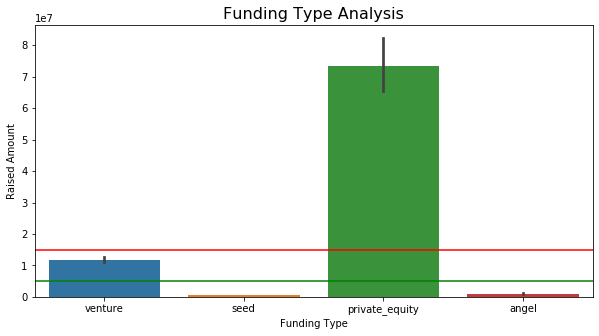

In [170]:
# bar plot with default statistic=mean
plt.figure(figsize=(10,5))
g=sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame_p)
g.set(xlabel='Funding Type', ylabel='Raised Amount')
g.set_title('Funding Type Analysis',fontsize =16)

plt.axhline(5000000, color='green')
plt.axhline(15000000, color='red')


plt.show()

Above plot clearly shows that Venture type funding is best funding type for Sparks fund for investing between 5 to 15 million USD

# Second Plot

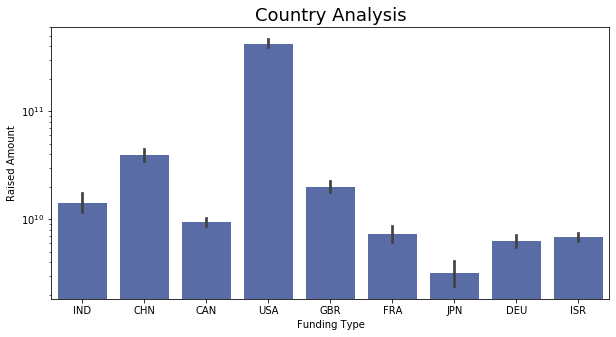

In [145]:
# bar plot with default statistic=mean
plt.figure(figsize=(10,5))
c=sns.barplot(x='country_code', y='raised_amount_usd', data=top9, estimator=np.sum,color=(0.3, 0.4, 0.7, 0.6))
c.set_yscale('log')
c.set(xlabel='Funding Type', ylabel='Raised Amount')
c.set_title('Country Analysis',fontsize =18)
plt.show()

A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type i.e venture)

# Third Plot

We have to create a master dataframe with data for top three sectors of top three countries

In [166]:
master_D=D1[D1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]
master_D=master_D.append(D2[D2['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])], ignore_index=True)
master_D=master_D.append(D3[D3['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])], ignore_index=True)

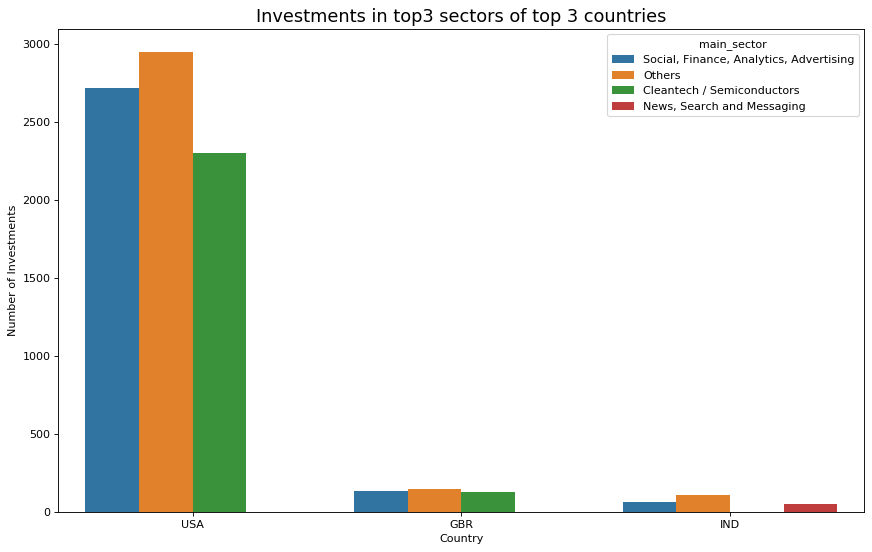

In [168]:
# set figure size for larger figure
plt.figure(num=None, figsize=(13, 8), dpi=80, facecolor='w', edgecolor='k')
s=sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=master_D, estimator=lambda x: len(x))
s.set(xlabel='Country', ylabel='Number of Investments')
s.set_title('Investments in top3 sectors of top 3 countries',fontsize =16)
plt.show()